In [88]:
import xarray as xr
import pandas as pd
import numpy as np
from dask.distributed import Client, progress


client = Client()
client

/home/alexakt2/envs/xarray-climate/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44815 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:44815/status,
Dashboard: http://127.0.0.1:44815/status,Workers: 4
Total threads: 4,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33775,Workers: 0
Dashboard: http://127.0.0.1:44815/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:32883,Total threads: 1
Dashboard: http://127.0.0.1:36867/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:36259,


In [89]:
# Importing the data
import cdsapi

client = cdsapi.Client(
    url='https://cds.climate.copernicus.eu/api',
    key='ee4c4632-35d5-4d92-bb7b-f556e11f998f'
)

client.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'total_precipitation',
        'year': [
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022', '2023',
            '2024'
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12'
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31'
        ],
        'time': ['00:00'],
        'format': 'netcdf',
        'area': [45.5667, 138.85, 40.5667, 143.85],
    },
    'sapporo_precip_2015_2024.nc'
)


2025-09-26 01:00:02,070 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-26 01:00:02,071 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-26 01:00:02,900 INFO Request ID is 7377b076-8093-40d8-b9f9-9e5de936bd65
2025-09-26 01:00:03,255 INFO status has been updated to accepted
2025-09-26 01:01:19,551 INFO status has been updated to running
2025-09-26 01:08:24,706 INFO status has been updated to successful


'sapporo_precip_2015_2024.nc'

In [91]:
# Open the file and Print
tp_daily = xr.open_dataset("sapporo_precip_2015_2024.nc")


print(tp_daily)


<xarray.Dataset> Size: 7MB
Dimensions:     (valid_time: 3653, latitude: 21, longitude: 21)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 29kB 2015-01-01 ... 2024-12-31
  * latitude    (latitude) float64 168B 45.57 45.32 45.07 ... 41.07 40.82 40.57
  * longitude   (longitude) float64 168B 138.8 139.1 139.3 ... 143.3 143.6 143.8
    expver      (valid_time) <U4 58kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 6MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-26T01:08 GRIB to CDM+CF via cfgrib-0.9.1...


In [92]:
# Saving to own variable 
lat2 = tp_daily['latitude']
lon2 = tp_daily['longitude']
time2 = tp_daily['valid_time']

In [93]:
#printing data to see the attributes.
tp=tp_daily['tp']
print(tp)

<xarray.DataArray 'tp' (valid_time: 3653, latitude: 21, longitude: 21)> Size: 6MB
[1610973 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 29kB 2015-01-01 ... 2024-12-31
  * latitude    (latitude) float64 168B 45.57 45.32 45.07 ... 41.07 40.82 40.57
  * longitude   (longitude) float64 168B 138.8 139.1 139.3 ... 143.3 143.6 143.8
    expver      (valid_time) <U4 58kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      441
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                 

In [94]:
# Convert from meters to milimeters
tp_mm = tp * 1000
print(tp_mm)


<xarray.DataArray 'tp' (valid_time: 3653, latitude: 21, longitude: 21)> Size: 6MB
array([[[4.78625298e-02, 8.17775726e-02, 1.41590834e-01, ...,
         5.15580177e-03, 4.94718552e-03, 5.12599945e-03],
        [5.98430634e-02, 8.61585140e-02, 1.62065029e-01, ...,
         1.63912773e-03, 1.75833702e-03, 1.63912773e-03],
        [6.52670860e-02, 7.16745853e-02, 1.45018101e-01, ...,
         8.34465027e-03, 1.96695328e-03, 1.87754631e-03],
        ...,
        [4.40657139e-01, 4.34100628e-01, 4.33176756e-01, ...,
         7.02142715e-01, 6.04867935e-01, 3.73214483e-01],
        [3.89277935e-01, 3.85791063e-01, 4.66406345e-01, ...,
         6.35653734e-01, 6.14136457e-01, 6.51001930e-01],
        [3.35901976e-01, 3.67820263e-01, 4.66763973e-01, ...,
         4.27484512e-01, 5.89817762e-01, 6.70194626e-01]],

       [[3.50624323e-02, 3.78340483e-02, 4.26620245e-02, ...,
         4.60445881e-02, 3.35723162e-02, 2.49147415e-02],
        [3.84002924e-02, 4.05311584e-02, 4.34815884e-02, ...,
 

In [95]:
#Find and print the 95 percentile value
tp_95 = np.percentile(tp_mm, 95)
print(tp_95)

0.7704182


In [96]:
# Prep for plotting the cumulative distribution
tp_flat = tp_mm.values.flatten()
tp_flat = tp_flat[~np.isnan(tp_flat)]
tp_sorted = np.sort(tp_flat)
cdf = np.linspace(0, 1, len(tp_sorted))

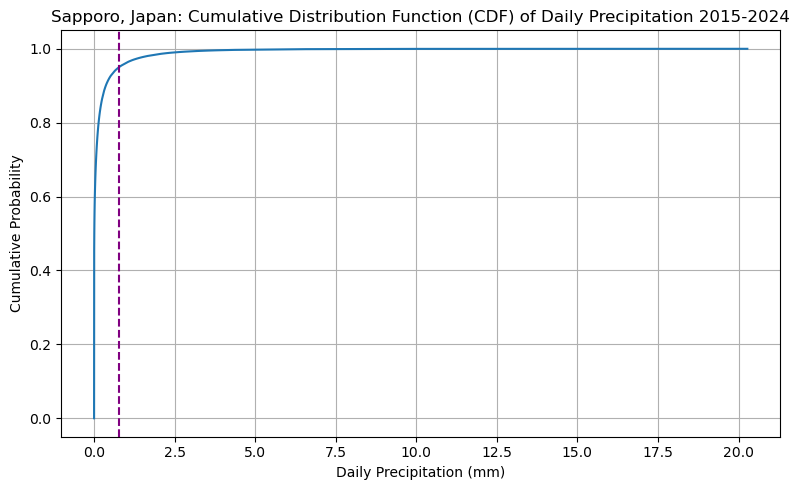

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(tp_sorted, cdf)
plt.axvline(x=tp_95, color='purple', linestyle='--', label='95% value of daily precipitation (mm)')
plt.xlabel("Daily Precipitation (mm)")
plt.ylabel("Cumulative Probability")
plt.title("Sapporo, Japan: Cumulative Distribution Function (CDF) of Daily Precipitation 2015-2024")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#I need to reload data for the US since I did not read through the instructions at first 
# and my original data is for Sapporo, Japan. 

# For part 3, I will be using data around Orono, Maine. 


In [10]:
# Loading in data provided on Slack
ds_climo = xr.open_dataset('https://www.atmos.illinois.edu/~snesbitt/data/ERA-5_total_precipitation_monthly-1981-2020.nc', engine='h5netcdf')
ds_climo.to_netcdf('ERA-5_total_precipitation_monthly-1981-2020.nc')

In [11]:
ds_climo
tp_climo=ds_climo['tp']
print(tp_climo)


<xarray.DataArray 'tp' (valid_time: 372, latitude: 721, longitude: 1440)> Size: 2GB
[386225280 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 3kB 1990-01-01T06:00:00 ... 2020-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 6kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgad
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:      

In [12]:
# Convert from meters to milimeters
tp_climo_mm = tp_climo * 1000
print(tp_climo_mm)

<xarray.DataArray 'tp' (valid_time: 372, latitude: 721, longitude: 1440)> Size: 2GB
array([[[0.71525574, 0.71525574, 0.71525574, ..., 0.71525574,
         0.71525574, 0.71525574],
        [0.74863434, 0.74768066, 0.74768066, ..., 0.74768066,
         0.74768066, 0.74768066],
        [0.7648468 , 0.7658005 , 0.7658005 , ..., 0.7658005 ,
         0.7658005 , 0.7658005 ],
        ...,
        [0.1821518 , 0.18310547, 0.18310547, ..., 0.1821518 ,
         0.1821518 , 0.18310547],
        [0.18119812, 0.18119812, 0.18119812, ..., 0.18119812,
         0.18119812, 0.18119812],
        [0.19454956, 0.19454956, 0.19454956, ..., 0.19454956,
         0.19454956, 0.19454956]],

       [[0.88119507, 0.88119507, 0.88119507, ..., 0.88119507,
         0.88119507, 0.88119507],
        [0.92983246, 0.92983246, 0.92983246, ..., 0.92983246,
         0.92983246, 0.92983246],
        [0.96035004, 0.96035004, 0.9613037 , ..., 0.96035004,
         0.96035004, 0.96035004],
...
        [0.30517578, 0.30517578, 

In [39]:
# Slicing data to match data being imported.

lat_min = 24.9
lat_max = 64.9
lon_min = 271.25
lon_max = 311.25



tp_area = tp_climo_mm.sel(
    latitude=slice(lat_max, lat_min),
    longitude=slice(lon_min, lon_max)
)



In [ ]:
# Getting the monthly anomalies (subtracting long term average from the monthly data)
anom_monthly = tp_area.groupby('valid_time.month') - tp_area.sel(valid_time=slice('1981-01', '2010-12')).groupby('valid_time.month').mean('valid_time')

In [ ]:
# Get the anomaly mean over time to plot
anom_mean = anom_monthly.mean(dim='valid_time')

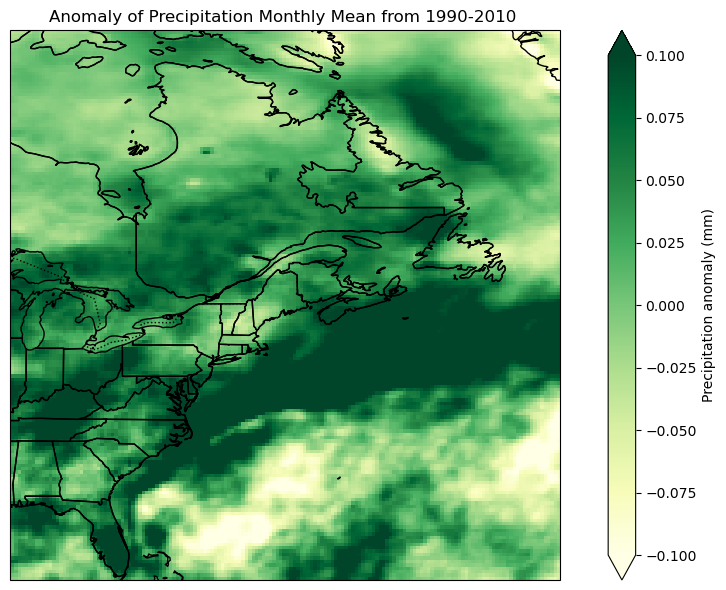

In [87]:
# Plot

import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
center_lat = 44.9
center_lon = -68.7
lat_range = (center_lat - 20, center_lat + 20)
lon_range = (center_lon - 20, center_lon + 20)

ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')


anom_mean.plot(
    ax=ax,                       
    transform=ccrs.PlateCarree(), 
    cmap='YlGn',
    cbar_kwargs={'label': 'Precipitation anomaly (mm)'},  
    vmin=-0.1,  
    vmax=0.1
)

ax.set_title('Anomaly of Precipitation Monthly Mean from 1990-2010 ')
plt.tight_layout()
plt.show()

In [56]:
# Importing the new Orono, Maine data
import cdsapi

client = cdsapi.Client(
    url='https://cds.climate.copernicus.eu/api',
    key='ee4c4632-35d5-4d92-bb7b-f556e11f998f'
)

client.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'total_precipitation',
        'year': [
            '1990', '1991', '1992', '1993', '1994', '1995',
            '1996', '1997', '1998', '1999', '2000', '2001',
            '2002', '2003', '2004', '2005', '2006', '2007',
            '2008', '2009', '2010', '2011', '2012', '2013',
            '2014', '2015', '2016', '2017', '2018', '2019',
            '2020'
        ],
        'month': [
            '01', '02', '03', '04', '05', '06',
            '07', '08', '09', '10', '11', '12'
        ],
        'day': [
            '01', '02', '03', '04', '05', '06',
            '07', '08', '09', '10', '11', '12',
            '13', '14', '15', '16', '17', '18',
            '19', '20', '21', '22', '23', '24',
            '25', '26', '27', '28', '29', '30',
            '31'
        ],
        'time': ['00:00'],
        'format': 'netcdf',
        'area': [64.9, -88.67, 24.9, -48.67]
    },
    'orono_maine_precipitation_1990_2020.nc'
)

# The area chosen is around Orono, Maine, USA.


2025-09-26 00:06:01,665 INFO [2025-09-03T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://confluence.ecmwf.int/x/E7uBEQ/). Thank you.
2025-09-26 00:06:01,666 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-09-26 00:06:02,721 INFO Request ID is ed0e21da-e70a-4ec5-98e1-2a718e1f6eeb
2025-09-26 00:06:02,863 INFO status has been updated to accepted
2025-09-26 00:06:16,903 INFO status has been updated to successful


'orono_maine_precipitation_1990_2020.nc'

In [57]:
# Open the file and Print
tp_daily_ME = xr.open_dataset("orono_maine_precipitation_1990_2020.nc")

In [58]:
tp_ME=tp_daily_ME['tp']
print(tp_climo)

<xarray.DataArray 'tp' (valid_time: 372, latitude: 721, longitude: 1440)> Size: 2GB
array([[[0.000715, 0.000715, ..., 0.000715, 0.000715],
        [0.000749, 0.000748, ..., 0.000748, 0.000748],
        ...,
        [0.000181, 0.000181, ..., 0.000181, 0.000181],
        [0.000195, 0.000195, ..., 0.000195, 0.000195]],

       [[0.000881, 0.000881, ..., 0.000881, 0.000881],
        [0.00093 , 0.00093 , ..., 0.00093 , 0.00093 ],
        ...,
        [0.000132, 0.000132, ..., 0.000132, 0.000132],
        [0.000153, 0.000153, ..., 0.000153, 0.000153]],

       ...,

       [[0.00173 , 0.00173 , ..., 0.00173 , 0.00173 ],
        [0.001848, 0.001848, ..., 0.001846, 0.001848],
        ...,
        [0.000303, 0.000303, ..., 0.000303, 0.000303],
        [0.000317, 0.000317, ..., 0.000317, 0.000317]],

       [[0.00054 , 0.00054 , ..., 0.00054 , 0.00054 ],
        [0.000589, 0.000589, ..., 0.000589, 0.000589],
        ...,
        [0.000355, 0.000355, ..., 0.000355, 0.000355],
        [0.00033 , 0

In [59]:
# Saving to own variable 
lat = tp_daily_ME['latitude']
lon = tp_daily_ME['longitude']
time = tp_daily_ME['valid_time']

In [60]:
# Convert from meters to milimeters
tp_ME_mm = tp_ME * 1000
print(tp_ME_mm)

<xarray.DataArray 'tp' (valid_time: 11323, latitude: 161, longitude: 161)> Size: 1GB
array([[[2.38418579e-04, 0.00000000e+00, 0.00000000e+00, ...,
         1.54972076e-03, 5.96046448e-04, 4.76837158e-04],
        [2.38418579e-04, 2.38418579e-04, 2.38418579e-04, ...,
         1.43051147e-03, 1.31130219e-03, 1.43051147e-03],
        [7.15255737e-04, 7.15255737e-04, 1.19209290e-03, ...,
         1.06096268e-02, 1.18017197e-02, 1.26361847e-02],
        ...,
        [1.18136406e-01, 7.16447830e-02, 1.07169151e-01, ...,
         5.48362732e-03, 8.70227814e-03, 9.29832458e-03],
        [3.68356705e-02, 4.38690186e-02, 8.07046890e-02, ...,
         8.34465027e-04, 8.34465027e-04, 1.43051147e-03],
        [8.22544098e-03, 2.47955322e-02, 3.98159027e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.03712082e-02, 9.29832458e-03, 7.74860382e-03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.16825104e-02, 9.17911530e-03, 7.15255737e-03, ...

In [69]:
# Find and print the 95 percentile value
tp_95 = np.percentile(tp_ME_mm, 95)
print(tp_95)

0.6660223


In [68]:
# Mask the days above 95 percentile
tp_mask = tp_ME_mm < tp_95

In [70]:
# Composite_Mean
comp_mean = tp_ME_mm.where(tp_mask).mean(dim='valid_time')

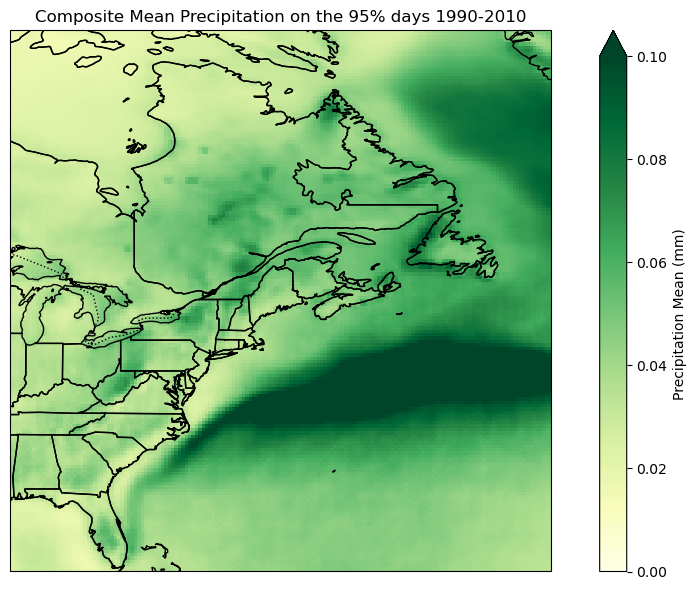

In [86]:
# Plot

import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
center_lat = 44.9
center_lon = -68.7
lat_range = (center_lat - 20, center_lat + 20)
lon_range = (center_lon - 20, center_lon + 20)

ax.set_extent([lon_range[0], lon_range[1], lat_range[0], lat_range[1]], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')


comp_mean.plot(
    ax=ax,                       
    transform=ccrs.PlateCarree(), 
    cmap='YlGn',
    cbar_kwargs={'label': 'Precipitation Mean (mm)'},  
    vmin=0,  
    vmax=0.1
)

ax.set_title('Composite Mean Precipitation on the 95% days 1990-2010')
plt.tight_layout()
plt.show()